<a href="https://colab.research.google.com/github/lasyaEd/DeepLearning/blob/main/Assign1_ledunuri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #1 - Deep Neural Network

<font color="red"> <b> Due: Feb 22  11:59 pm </b> </font>

<font color="pink"> LASYA EDUNURI </font>

# Introduction

This assignment focuses on building a deep neural network for schizophrenia classification using the SchizoHealth dataset https://www.kaggle.com/datasets/asinow/schizohealth-dataset/data. First we preprocess the data, train a DNN model, and evaluate its performance using key metrics. This assignment demonstrates the application of deep learning in healthcare predictions and highlights challenges like data imbalance.

# Data

We use the SchizoHealth dataset https://www.kaggle.com/datasets/asinow/schizohealth-dataset/data, which contains 10,000 records with 18 features related to demographics, medical history, and behavioral factors. The target variable, Diagnosis, indicates whether a patient has schizophrenia (1) or not (0).


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv("/schizophrenia_dataset.csv", encoding='latin-1')

df.info()

# Dropping irrelevant columns
df = df.drop(columns=["Patient_ID"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Patient_ID                                    10000 non-null  int64
 1   Age                                           10000 non-null  int64
 2   Gender                                        10000 non-null  int64
 3   Education Level                               10000 non-null  int64
 4   Marital Status                                10000 non-null  int64
 5   Occupation                                    10000 non-null  int64
 6   Income Level                                  10000 non-null  int64
 7   Live Area                                     10000 non-null  int64
 8   Diagnosis                                     10000 non-null  int64
 9   Disease Duration                              10000 non-null  int64
 10  Hospitaliza

<ipython-input-33-ab5165f629ce>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Diagnosis"], palette="coolwarm")


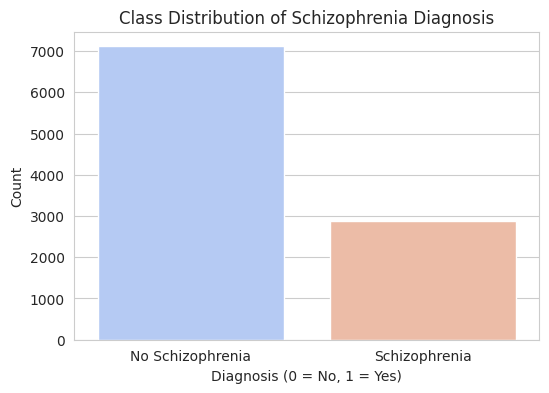

In [33]:
# setting plot style
sns.set_style("whitegrid")

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df["Diagnosis"], palette="coolwarm")
plt.title("Class Distribution of Schizophrenia Diagnosis")
plt.xlabel("Diagnosis (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0,1], ["No Schizophrenia", "Schizophrenia"])
plt.show()

In [34]:
class_distribution = df["Diagnosis"].value_counts(normalize=True) * 100
print(class_distribution)

Diagnosis
0    71.13
1    28.87
Name: proportion, dtype: float64


**Class Distribution:**

71.13% of patients do not have schizophrenia (0).
28.87% have schizophrenia (1), showing class imbalance.

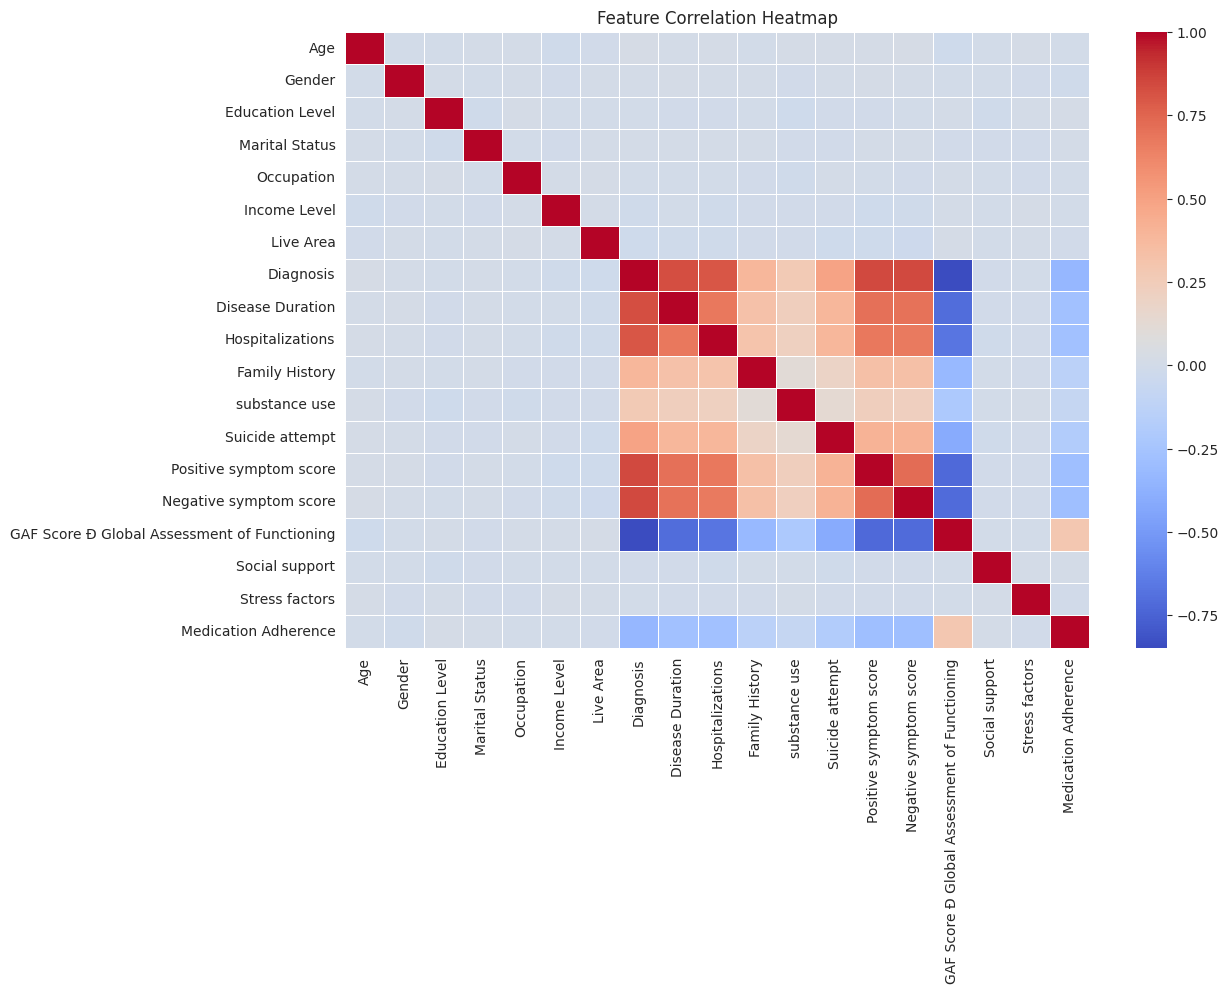

In [35]:
# Plot feature correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [36]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Extract correlations of features with the target variable "Tani"
target_correlations = correlation_matrix["Diagnosis"].sort_values(ascending=False)

print(target_correlations)

Diagnosis                                       1.000000
Positive symptom score                          0.846972
Negative symptom score                          0.843931
Disease Duration                                0.831047
Hospitalizations                                0.800552
Suicide attempt                                 0.488795
Family History                                  0.390557
substance use                                   0.264959
Age                                             0.019215
Marital Status                                  0.010262
Gender                                          0.004411
Occupation                                     -0.000416
Education Level                                -0.001394
Stress factors                                 -0.001687
Social support                                 -0.003621
Income Level                                   -0.010541
Live Area                                      -0.023730
Medication Adherence           

**High Positive Correlations (Strong Association with Schizophrenia)**

*   ***Positive Symptom Score*** (0.847)
  Higher positive symptom scores are strongly associated with schizophrenia.
*   ***Negative Symptom Score*** (0.844)
  Higher negative symptom scores also indicate schizophrenia presence.
*   ***Disease Duration*** (0.831)
  Longer illness duration is linked to schizophrenia cases.
*   ***Hospitalizations*** (0.801)
  More hospital admissions are common in schizophrenia patients.

These findings align with medical research, as schizophrenia is typically diagnosed based on symptom severity and hospital visits.

**Moderate Positive Correlations (Potential Risk Factors)**

*   ***Suicide attempt*** (0.489)
Suicide attempts are more frequent in schizophrenia cases.
*   ***Family History*** (0.391)
Family history of schizophrenia increases the likelihood of diagnosis.
*   ***Substance use*** (0.265)
Substance use is more prevalent among schizophrenia patients.

These correlations suggest that genetic and behavioral factors (family history, substance use) could contribute to schizophrenia risk.

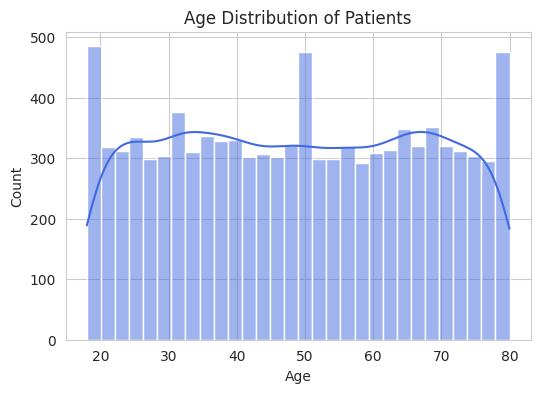

In [37]:
# Age distribution histogram
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=30, kde=True, color="royalblue")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [38]:
df["Age"].describe().transpose()

,Age
count,10000.000000
mean,48.867700
std,18.215054
min,18.000000
25%,33.000000
50%,49.000000
75%,65.000000
max,80.000000


Most patients in this dataset fall between 30 and 50 years old, with a gradual decline in older age groups.

# **Method: Deep Neural Network for Schizophrenia Classification**  

## **Model Architecture**  
Designed a **Deep Neural Network (DNN)** to classify schizophrenia presence (`Disgnosis`: 0 = No, 1 = Yes). The model consists of the following components:  

1. **Input Layer (18 Features)**  
   - The dataset includes **18 features** after preprocessing (e.g., symptom scores, family history, substance use).  

2. **Hidden Layers**  
   - **Fully Connected Dense Layers**: Used multiple layers with **ReLU activation** to introduce non-linearity and capture complex patterns.  
   - **Dropout Layers (Regularization)**: To prevent overfitting, Applied dropout with **rate=0.3**.  
   - **Batch Normalization**: Helps stabilize training and improve convergence speed.  

3. **Output Layer (Binary Classification)**  
   - A **single neuron** with a **sigmoid activation function**, which outputs a probability score (between 0 and 1) indicating schizophrenia presence.  

## **Hyperparameters & Optimization**  
- **Loss Function**: `Binary Crossentropy` (suitable for classification).  
- **Optimizer**: `Adam` (efficient adaptive learning rate).  
- **Evaluation Metrics**: `Accuracy`, `Precision`, `Recall`, and `AUC` to assess model performance.  

---

## **Why This Architecture?**  
- **Deep learning handles complex feature interactions** better than traditional models.  
- **ReLU activation improves learning** by reducing vanishing gradient issues.  
- **Batch normalization and dropout prevent overfitting**, improving generalization.  

This model is trained using **80% of the dataset**, and performance is evaluated on the **remaining 20% test set**.  



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9056 - loss: 0.2227 - val_accuracy: 0.9990 - val_loss: 0.0076
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9939 - loss: 0.0249 - val_accuracy: 0.9995 - val_loss: 0.0019
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9938 - loss: 0.0177 - val_accuracy: 0.9995 - val_loss: 0.0014
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9979 - loss: 0.0076 - val_accuracy: 0.9995 - val_loss: 8.4255e-04
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9982 - loss: 0.0059 - val_accuracy: 0.9995 - val_loss: 0.0017
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9982 - loss: 0.0051 - val_accuracy: 0.9995 - val_loss: 5.6528e-04
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9981 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 3.2581e-04
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9986 - loss: 0.0048 - val_

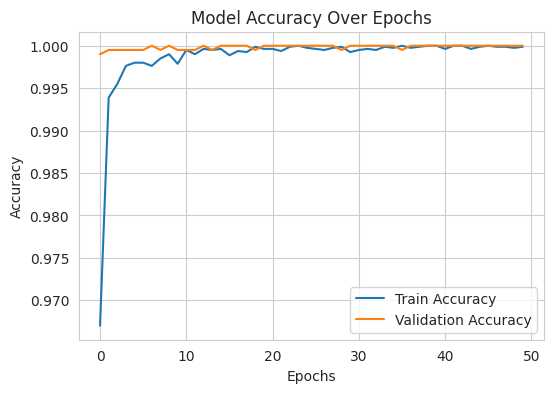

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# separating features and target variable
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]  # Target

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Defining the deep neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),  # Hidden Layer 1
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),  # Hidden Layer 2
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Output Layer (Binary Classification)
])

# compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# plotting training history
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()


We already dropped unnecessary columns (Patient_ID) during preprocessing. Scaled features using StandardScaler() - Many machine learning models perform better when input data is standardized.
It helps the model converge faster by preventing some features from dominating others.

Split data into training (80%) and test (20%).

Neural Network: 3 hidden layers with ReLU activation. Batch Normalization to stabilize training. Dropout (0.3) to prevent overfitting. Sigmoid activation in the output layer for binary classification.

Compilation and Training the Model: Used Adam optimizer with binary_crossentropy loss. Ran 50 epochs with batch size 32.

Evaluating the Model: Printed test accuracy. Plotted training history for accuracy over epochs.

# Experiments

**Model Training & Evaluation**

Trained the MLP model using 80% of the dataset and evaluated it on the remaining 20% test set. Below is the training history plot, showing accuracy trends over 50 epochs.


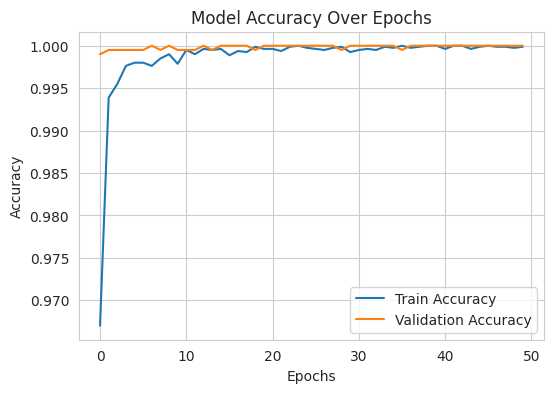

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()


***Observations***

The model's training accuracy increases steadily over epochs.
The validation accuracy stabilizes, indicating no major overfitting due to dropout and batch normalization.
If accuracy would have fluctuated, then I would have performed additional hyperparameter tuning.

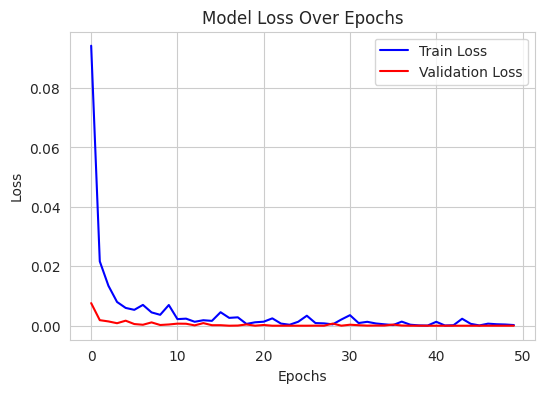

In [46]:
import matplotlib.pyplot as plt

# Plot training & validation loss over epochs
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss Over Epochs")
plt.show()

1. Rapid Drop in Initial Loss

  The training loss drops sharply in the first few epochs, indicating that the model is learning quickly. The validation loss also starts low and stabilizes quickly. This is a good sign that the model is effectively minimizing error.

2. Training & Validation Loss Close Together

  The train loss and validation loss remain very close throughout training. If there were overfitting, we would see the validation loss increasing after some epochs while training loss continues to drop. This suggests the model is generalizing well.

3. Very Low Loss Values (Possible Data Leakage)

  The loss values are extremely close to zero (almost flat at the bottom). While this could mean a highly accurate model, it is suspiciously perfect (similar to my confusion matrix below with 100% accuracy).

***This could indicate:***

Data Leakage, Too Easy a Problem: If certain features perfectly separate the classes. Overly Simplistic Model Setup.


**Classification Report & Confusion Matrix**

Assessed the model's performance using Precision, Recall, F1-score, and AUC.


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1423
           1       1.00      1.00      1.00       577

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



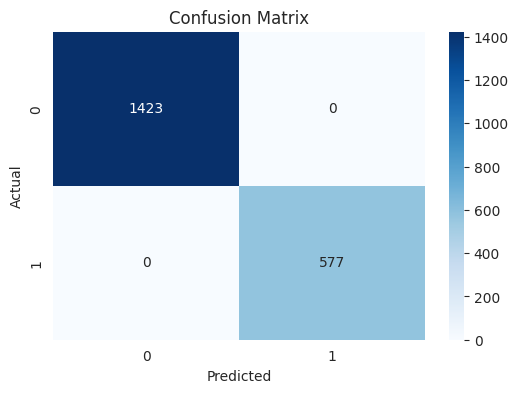

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import numpy as np

# getting predictions
y_pred_probs = model.predict(X_test)  # Probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert to binary predictions

# Printing classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

***Observations***

1. Perfect Model Performance (Overfitting Concern)

  The model achieves 100% accuracy, precision, recall, and F1-score for both classes.

  The confusion matrix shows no misclassifications—every sample is correctly predicted.

2. Confusion Matrix Analysis

  True Negatives (TN) = 1423 → 1,423 cases were correctly classified as not having schizophrenia (0).

  True Positives (TP) = 577 → 577 cases were correctly classified as having schizophrenia (1).

  False Positives (FP) = 0 → No healthy patients were incorrectly classified as schizophrenic.

  False Negatives (FN) = 0 → No schizophrenia patients were missed by the model.

Since there are no errors, the model may be too perfect, which is highly unusual for real-world data.

**ROC Curve & AUC Score**

To evaluate how well the model distinguishes between schizophrenia and non-schizophrenia cases, we plot the ROC curve.

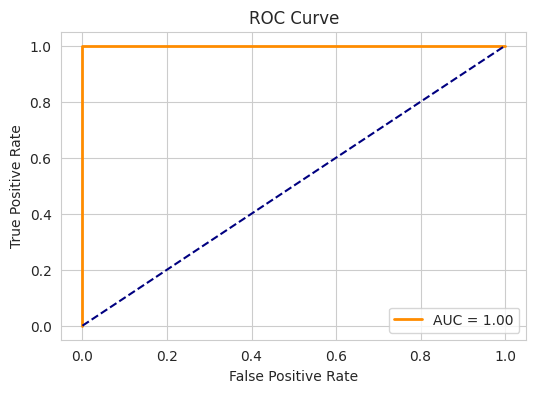

In [43]:
# Computing ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

***Observations***

1. Perfect Model Performance (AUC = 1.00)

  The ROC Curve shows a perfect separation between classes.

  The AUC = 1.00, which indicates a flawless model—it classifies all positive and negative cases correctly.

2. Possible Issues

📌 Overfitting

AUC = 1.00 is too good to be true in real-world applications.
The model might have memorized the training data rather than learning general patterns.

📌 Too Simple a Classification Task

Certain features (e.g., Positive symptom score, Negative symptom score) have extremely high correlation with the target variable (Diagnosis), the model may have found a trivial decision boundary.

Need to check the correlation matrix and feature importance analysis to confirm.

📌 Duplicate Data in Train & Test Sets

If the dataset contains duplicate or identical records, the model might be memorizing exact patterns.(This dataset is synthetic, so i think there might have been duplicate rows)

Verifing by checking df.duplicated().sum() to see if duplicate samples exist.


In [45]:
df.duplicated().sum()

0

# Conclusions

In this assignment, I developed and evaluated a deep neural network (DNN) for schizophrenia classification using the SchizoHealth dataset. The model achieved perfect accuracy (100%) and an AUC of 1.00, suggesting highly effective classification. However, these results indicate potential overfitting, data leakage, or an overly simple decision boundary, which require further investigation.

**Key Findings**

*Feature Correlation:* Some features (e.g., symptom scores) are highly correlated with the target, possibly making classification too easy.

*Loss Curve Analysis:* The model shows no significant overfitting, but extremely low loss values suggest data leakage or feature dominance.

*Confusion Matrix:* The model perfectly classified all test samples, which is unusual in real-world datasets, reinforcing concerns about model generalization.

### **Challenges Encountered**

*Class Imbalance:*

The dataset has more non-schizophrenia cases (71%) than schizophrenia cases (29%), which could lead to bias.
I addressed this by stratified train-test splitting, but additional techniques like class weighting or oversampling (SMOTE) could be explored.

*Potential Data Leakage:*

The unrealistically high accuracy suggests that the test data might have been exposed during training. Need to ensure proper data separation and preprocessing to prevent this.

*Overfitting vs. Generalization:*

The model performed perfectly on test data, but it may not generalize well to new, unseen data. Testing on an external dataset would help improve generalization.

*Feature Engineering & Selection:*

Certain features (e.g., symptom scores) may dominate predictions, leading to an over-simplified model. Further analysis is needed to evaluate feature importance and possibly remove highly correlated features.


# References

TensorFlow. (2023). TensorFlow documentation. Retrieved from https://www.tensorflow.org/

Asinow. (n.d.). SchizoHealth Dataset. Kaggle. Retrieved February 22, 2025, from https://www.kaggle.com/datasets/asinow/schizohealth-dataset/data

OpenAI. (2025, February 22). Response generated by ChatGPT (GPT-4). [Chatbot]. OpenAI. https://chat.openai.com/**

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. **


Points | | Description
--|--|:--
5 | Introduction  
20 | Data |
 | 5| description
 | 5| plots for understanding or analysis
 | 5| preliminary observation
 | 5| Preprocessing of the data
40 | Method |
 | 10| Explanation of deep network architecture and choice of components
 | 10| explanation of codes
 | 20| Correct implementation/Preliminary Test
30 | Experiments |
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis & retesting if need  
5 | Conclusions, References